# Loan Data Exploration
## by Xiaohua Chen

The analysis is organized in the following sections:
- [Preliminary Wrangling](#p)
- [Univariate Exploration](#u)
- [Bivariate Exploration](#be)
- [Multivariate Exploration](#m)


<a id = 'p'></a>

## Preliminary Wrangling

This data set contains 113,937 loans with 81 attributes on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, etc. The years span from 2005 to 2014.


In [99]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

First load the dataset.

In [436]:
#Load the data set
df = pd.read_csv('prosperLoanData.csv')

In [5]:
df.head()

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperRating,ListingCategory,...,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CreditScoreRangeUpper.1,CurrentCreditLines,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
0,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,NaN,0,...,True,640.0,659.0,659.0,5.0,1500.0,0.17,3083.333333,9425,330.43
1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,6.0,2,...,False,680.0,699.0,699.0,14.0,10266.0,0.18,6125.000000,10000,318.93
2,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,NaN,0,...,False,480.0,499.0,499.0,NaN,NaN,0.06,2083.333333,3001,123.32
3,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,6.0,16,...,True,800.0,819.0,819.0,5.0,30754.0,0.15,2875.000000,10000,321.45
4,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,3.0,2,...,True,680.0,699.0,699.0,19.0,695.0,0.26,9583.333333,15000,563.97


In [274]:
df.shape

(113937, 81)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

This is a big dataset, with 113937 x 81 values. Many variables have null values. This dataset needs to be cleaned, and number of variables will be reduced for further analysis.

Select a column to be used as the unique id. Candidates are ListingNumber, ListingKey and LoanNumber. 

In [9]:
df.ListingCreationDate.describe()

count                            113937
unique                           113064
top       2013-10-02 17:20:16.550000000
freq                                  6
Name: ListingCreationDate, dtype: object

In [10]:
df.LoanNumber.nunique()

113066

In [12]:
df.ListingNumber.nunique()

113066

In [13]:
df.ListingKey.nunique()

113066

The dataframe contains ~900 duplicated-ListingNumber records.

In [19]:
df[df.LoanNumber.duplicated()].head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037000000,NaN,60,Current,NaN,0.14528,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287000000,NaN,36,Current,NaN,0.24205,0.2045,0.1945,...,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [403]:
dup_list1 = df[df.ListingNumber == 1023355]

In [723]:
dup_list1

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.0762,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.0762,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [734]:
for c in dup_list1.columns:
    if  (pd.isna(dup_list1[c][8]) == False) & (dup_list1[c][8]!=dup_list1[c][9]):
        print('column: {}, values: {}, {}'.format( c, dup_list1[c][8],dup_list1[c][9] ))

column: ProsperScore, values: 9.0, 11.0


In [729]:
dup_list1['ProsperScore']

8     9.0
9    11.0
Name: ProsperScore, dtype: float64

Investigation of one duplicated ListingNumber yields in different ProsperScore. This feature will not necessarily be selected for analysis. Move on to select features, first.

In [437]:
df[['BorrowerAPR', 'BorrowerRate']][:20]

,BorrowerAPR,BorrowerRate
0,0.16516,0.1580
1,0.12016,0.0920
2,0.28269,0.2750
3,0.12528,0.0974
4,0.24614,0.2085
5,0.15425,0.1314
6,0.31032,0.2712
7,0.23939,0.2019
8,0.07620,0.0629
9,0.07620,0.0629


In [18]:
df.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

In [401]:
df.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [400]:
df.EmploymentStatus.value_counts()/113912

Employed         0.591000
Full-time        0.231363
Self-employed    0.053849
Not available    0.046940
Other            0.033412
Part-time        0.009551
Not employed     0.007330
Retired          0.006979
Name: EmploymentStatus, dtype: float64

In [426]:
# Select the following columns for analysis:
select_metrics = ['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus',
                 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (numeric)', 
                 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus',
                 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper' ,
                 'CreditScoreRangeUpper', 'CurrentCreditLines' , 'AvailableBankcardCredit' ,  
                 'DebtToIncomeRatio','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment']


In [432]:
remove_metrics = df.columns.difference(select_metrics)

In [438]:
# note: df = pd.read_csv('...', usecols = select_metrics ) can be used 
df.drop(columns = remove_metrics, inplace = True)

In [440]:
df.drop_duplicates(inplace = True)
df.shape

(113066, 22)

In [441]:
df.ListingNumber.duplicated().sum()

0

After trimming features, ListingNumbers do not have duplicates any more.

In [71]:
# find out about listing dates range
type(df.ListingCreationDate[1])

str

In [77]:
df.ListingCreationDate = pd.to_datetime( df.ListingCreationDate)
df.ListingCreationDate.max()

Timestamp('2014-03-10 12:20:53.760000')

In [78]:
df.ListingCreationDate.min()

Timestamp('2005-11-09 20:44:28.847000')

In [447]:
# clean up a few column names
df.rename(columns = {'ProsperRating (numeric)':'ProsperRating','ListingCategory (numeric)':'ListingCategory'}, inplace = True)

In [448]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,ProsperRating,ListingCategory,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,1.130660e+05,113066.000000,113041.000000,113066.000000,83982.000000,113066.000000,112475.000000,112475.000000,105462.000000,105522.000000,104594.000000,1.130660e+05,113066.000000,113066.000000
mean,6.248036e+05,40.800170,0.218980,0.192946,4.068705,2.776838,685.524961,704.524961,10.307058,11208.182028,0.276032,5.605120e+03,8314.762307,271.932742
std,3.273262e+05,10.421518,0.080483,0.074917,1.675442,3.998188,66.635895,66.635895,5.458196,19847.681185,0.553738,7.495596e+03,6237.007841,192.549979
min,4.000000e+00,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.000000,0.000000
25%,3.976670e+05,36.000000,0.156290,0.134000,3.000000,1.000000,660.000000,679.000000,7.000000,876.000000,0.140000,3.199396e+03,4000.000000,130.950000
50%,5.978385e+05,36.000000,0.209840,0.184000,4.000000,1.000000,680.000000,699.000000,10.000000,4090.000000,0.220000,4.666667e+03,6300.000000,217.370000
75%,8.849650e+05,36.000000,0.283860,0.250600,5.000000,3.000000,720.000000,739.000000,13.000000,13165.000000,0.320000,6.824688e+03,12000.000000,370.570000
max,1.255725e+06,60.000000,0.512290,0.497500,7.000000,20.000000,880.000000,899.000000,59.000000,646285.000000,10.010000,1.750003e+06,35000.000000,2251.510000


In [442]:
df.shape

(113066, 22)

In [451]:
# save cleaned dataset to a new file
df.to_csv('selectLoanData.csv', index = False )

### What is the structure of your dataset?

It's a table of 113937 rows, each of which a loan listing, and 81 columns, denoting properties of the loan. By selecting a subset of the properties (as in select_metrics), then removing duplicate rows, the dataset reduces to size of 113066 x 22. The years range from 2005 to 2014.

### What is/are the main feature(s) of interest in your dataset?

'LoanStatus', 'BorrowerRate' are of key interest in this dataset. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

'LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'CreditScoreRangeLower', 'Term', 'IsBorrowerHomeowner', 'ListingCategory' are features that may support the investigation.

<a id = 'u'></a>

## Univariate Exploration

Look into individual variables to gain initial insights, and perform further clean up of the data.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 22 columns):
ListingNumber              113066 non-null int64
ListingCreationDate        113066 non-null object
CreditGrade                28953 non-null object
Term                       113066 non-null int64
LoanStatus                 113066 non-null object
ClosedDate                 55076 non-null object
BorrowerAPR                113041 non-null float64
BorrowerRate               113066 non-null float64
ProsperRating              83982 non-null float64
ListingCategory            113066 non-null int64
BorrowerState              107551 non-null object
Occupation                 109537 non-null object
EmploymentStatus           110811 non-null object
IsBorrowerHomeowner        113066 non-null bool
CreditScoreRangeLower      112475 non-null float64
CreditScoreRangeUpper      112475 non-null float64
CurrentCreditLines         105462 non-null float64
AvailableBankcardCredit    105522 non-nul

Start the exploration with a list of numeric variables.

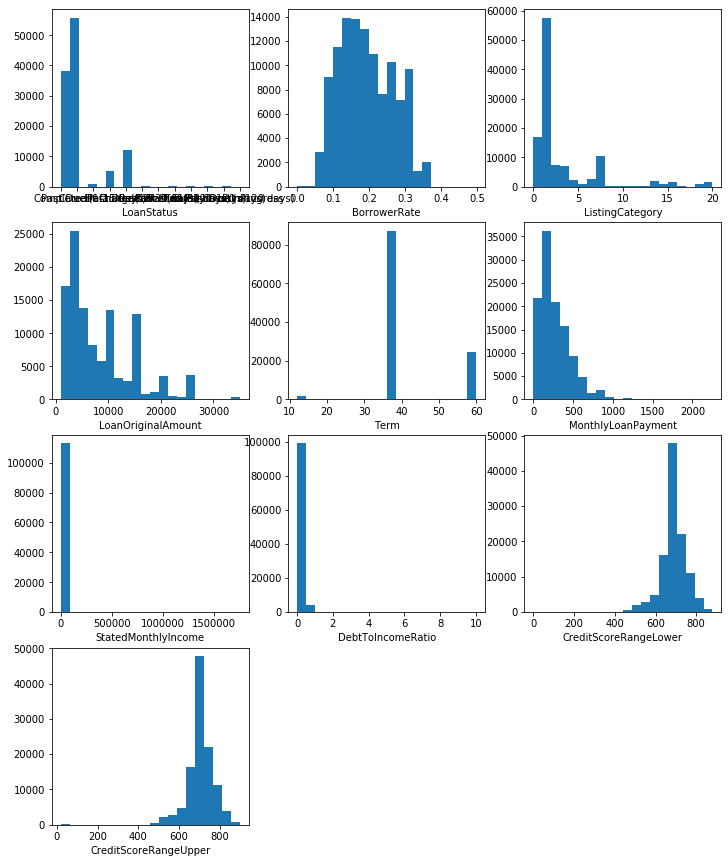

In [85]:
metrics = ['LoanStatus', 'BorrowerRate','ListingCategory','LoanOriginalAmount','Term','MonthlyLoanPayment',
 'StatedMonthlyIncome','DebtToIncomeRatio','CreditScoreRangeLower','CreditScoreRangeUpper' ]
plt.figure(figsize = [12,15] )
i=0
for m in metrics:
    i+=1
    plt.subplot(4,3,i)
    plt.hist(data = df, x=m, bins = 20)
    plt.xlabel(m)
    #plt.xticks(rotation = 15)
   

First-glace observations:
* Borrowing rates are mainly distributed between 0.05 ~ 0.36
* CreditScoreLower and Upper have very similar distributions, the latter with slightly higher values. Keep one for further analysis.

Some of the metrics are to be further examined with the following plots.

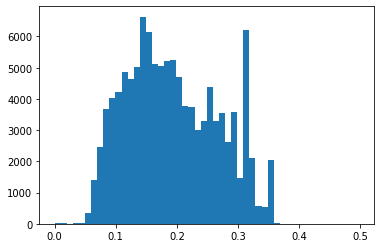

In [644]:
# look into BorrowerRate with finer granularity
plt.hist(data = df, x = 'BorrowerRate', bins = 50);

- BorrowerRate has a multimodal distribution with highest peaks around 0.15 and 0.31

''

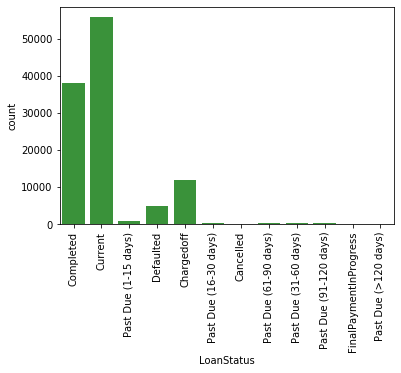

In [25]:
#replot the loanStatus metric with visible x-labels
b_color = sb.color_palette()[2]
sb.countplot(data = df, x = 'LoanStatus', color = b_color)
plt.xticks(rotation = 90)
;

* Majority of LoanStatus is 'current' or 'completed', followed by 'chargedoff' or 'defaulted'. Very small portions are 'past due'.

Note: Seaborn.countplot() does a better job than pyplot.hist() when plotting LoanStatus.

In [450]:
# check out the listing categories
df.ListingCategory.value_counts()

1     57624
0     16965
7     10448
2      7388
3      7157
6      2568
4      2395
13     1987
15     1507
18      882
14      863
19      764
20      762
5       756
16      304
11      214
8       196
10       91
9        85
12       58
17       52
Name: ListingCategory, dtype: int64

The following table is from 'Prosper Loan Data - Variable Definitions.csv'. 
- Based on value counts, majority of the loans are for 1 - 'debt consolitation'. Other notable types are 2 - 'home improvement', 3 - 'business'.

Loan Categories:

|Code | Category |
| --- | ------------------ |
| 0 | Not Available |
| 1 | Debt Consolidation|
| 2 | Home Improvement|
| 3 | Business|
| 4 | Personal Loan|
| 5 | Student Use|
| 6 | Auto|
| 7 | Other|
| 8 | Baby&Adoption|
| 9 | Boat|
| 10 | Cosmetic Procedure|
| 11 | Engagement Ring|
| 12 | Green Loans|
| 13 | Household Expenses|
| 14 | Large Purchases|
| 15 | Medical/Dental|
| 16 | Motorcycle|
| 17 | RV|
| 18 | Taxes|
| 19 | Vacation|
| 20 | Wedding Loans

In [86]:
# Check out home ownership of the borrowers.
df.IsBorrowerHomeowner.value_counts()

True     57052
False    56014
Name: IsBorrowerHomeowner, dtype: int64

Text(0.5, 0, 'Is borrower home owner')

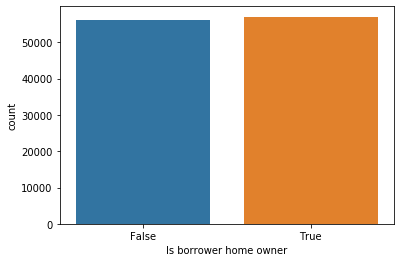

In [88]:
sb.countplot(data = df, x = 'IsBorrowerHomeowner')
plt.xlabel('Is borrower home owner')

* Roughly half of the borrowers are home owners.

In [57]:
df.Term.value_counts()

36    87224
60    24228
12     1614
Name: Term, dtype: int64

* The data are all short term loans ranging from 1 to 5 years, with majority at 3 years.

In [29]:
# Investigate StatedMonthlyIncome
df.StatedMonthlyIncome.describe()

count    1.130660e+05
mean     5.605120e+03
std      7.495596e+03
min      0.000000e+00
25%      3.199396e+03
50%      4.666667e+03
75%      6.824688e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

''

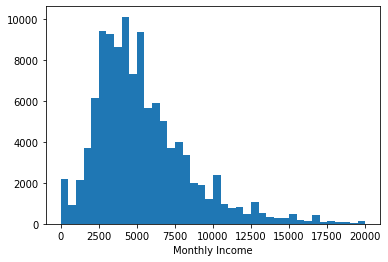

In [62]:
plt.hist( x = df['StatedMonthlyIncome'][df.StatedMonthlyIncome<=20000], bins = 40)
plt.xlabel('Monthly Income')
;

In [472]:
df[df.StatedMonthlyIncome<1].shape[0]/df.shape[0]

0.014566713247129996

In [76]:
df[df.StatedMonthlyIncome<0.01].shape[0]/df.shape[0]

0.012329082129021987

* 1.2% of the loans' borrowers have monthly income less than 1 cent. 

Monthly income may be better represented in log scale.

Text(0.5, 0, 'Monthly Income')

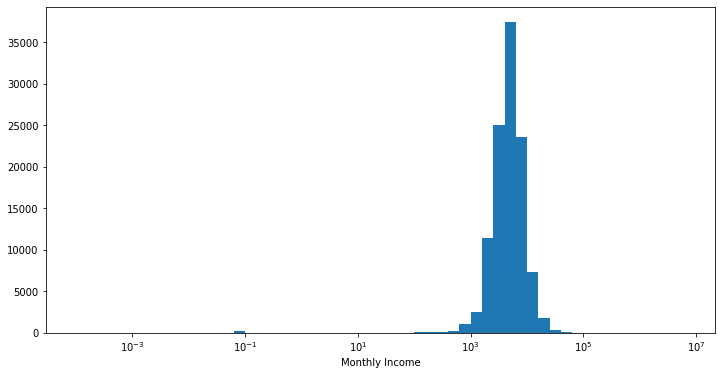

In [453]:
plt.figure(figsize = [12,6])
xt = 10**np.arange(-4,7, 0.2)
plt.hist( x = df['StatedMonthlyIncome'], bins= xt )
plt.xscale('log')
plt.xlabel('Monthly Income')


The small portion of incomes < 0.1 look like anomaly.

(100, 100000)

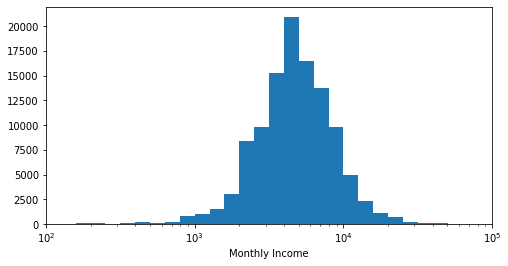

In [63]:
# a 'normal' look at the montly income, ignoring the extremely low values of income
plt.figure(figsize = [8,4])
xt = 10**np.arange(1,7, 0.1)
plt.hist( x = df['StatedMonthlyIncome'], bins= xt )
plt.xscale('log')
plt.xlabel('Monthly Income')

plt.xlim(100, 100000)

* Monthly income follows a lognormal-like distribution, with center around 4000~5000.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


''

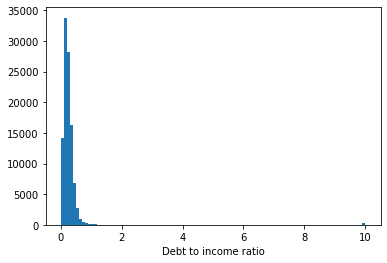

In [64]:
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = 100)
plt.xlabel('Debt to income ratio')
;

There is a very long tail for DebtToIncome ratio.

In [50]:
df[df.DebtToIncomeRatio>10]

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperRating,ListingCategory,...,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
225,104542,2007-02-28 10:45:44.153,D,36,Completed,2009-07-07 00:00:00,0.11749,0.1000,NaN,0,...,Full-time,True,600.0,619.0,30.0,49014.0,10.01,0.083333,1000,32.27
575,124494,2007-04-16 17:44:06.780,AA,36,Completed,2007-06-28 00:00:00,0.10505,0.0935,NaN,0,...,Retired,False,800.0,819.0,9.0,36908.0,10.01,0.083333,1500,47.94
625,560943,2012-02-20 16:08:45.633,NaN,36,Current,NaN,0.35797,0.3177,1.0,1,...,Employed,False,700.0,719.0,6.0,4955.0,10.01,3.833333,2000,86.85
1240,146341,2007-06-03 20:32:32.783,A,36,Completed,2010-05-25 00:00:00,0.11415,0.1072,NaN,0,...,Not employed,False,740.0,759.0,6.0,22118.0,10.01,0.083333,3000,97.82
1923,139992,2007-05-19 11:14:54.370,A,36,Defaulted,2010-09-29 00:00:00,0.08684,0.0800,NaN,0,...,Not employed,False,740.0,759.0,9.0,5882.0,10.01,0.083333,3000,68.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111459,105214,2007-03-01 15:44:40.763,A,36,Completed,2008-09-24 00:00:00,0.16516,0.1580,NaN,0,...,Self-employed,True,720.0,739.0,4.0,1500.0,10.01,0.083333,6001,210.39
111859,266982,2008-01-17 10:03:22.690,D,36,Chargedoff,2009-09-24 00:00:00,0.25517,0.2400,NaN,3,...,Full-time,False,620.0,639.0,1.0,0.0,10.01,0.083333,2850,111.81
112240,844455,2013-07-19 08:39:08.107,NaN,36,Current,NaN,0.33286,0.2932,2.0,1,...,Employed,False,680.0,699.0,5.0,52.0,10.01,2.083333,2000,84.16
112396,627138,2012-08-21 13:57:58.080,NaN,60,Defaulted,2013-09-17 00:00:00,0.27554,0.2498,4.0,2,...,Employed,True,780.0,799.0,9.0,6124.0,10.01,2.916667,4000,117.36


Some loans with >10 DebtToIncomeRatio (DTI) are small loans for people who claim to have insubstantial income.

In [563]:
df[df.DebtToIncomeRatio>10].shape[0]/df.shape[0]

0.0024056745617603878

In [564]:
df[df.DebtToIncomeRatio>2].shape[0]/df.shape[0]

0.004236463658394213

* DTI values can be as high as 10, the proportion of DTI > 2 is  0.4% of the total.

In [459]:
df[df.DebtToIncomeRatio>1].StatedMonthlyIncome.describe()

count      798.000000
mean       835.385234
std       1495.972287
min          0.000000
25%          0.083333
50%        239.416667
75%       1083.333333
max      17083.333333
Name: StatedMonthlyIncome, dtype: float64

Borrowers with DTI > 1 often have low income.

DTI is monthly debt payment divided by monthly income. According to [Investopedia](https://www.investopedia.com/ask/answers/081214/whats-considered-be-good-debttoincome-dti-ratio.asp 'Investopedia article on "Good CTI ratio"'), lenders prefer to see a debt-to-income ratio smaller than 36%.

''

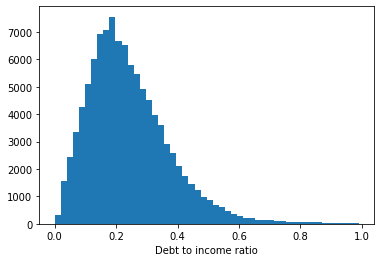

In [460]:
# Truncate DTI plot at 1
plt.hist(x = df['DebtToIncomeRatio'][df.DebtToIncomeRatio < 1], bins = 50)
plt.xlabel('Debt to income ratio')
;

* Most loans are lent to customer with debt-to-income-ratio < 0.8, most commonly at ~0.2

''

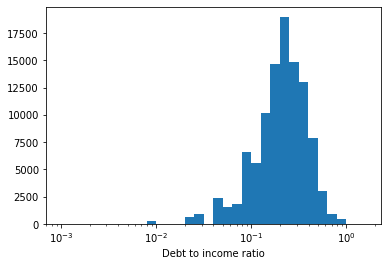

In [461]:
# try plotting DTI in log scale
bin_e = 10**np.arange(-3, 0.21, 0.1)
plt.hist(x = df['DebtToIncomeRatio'][df.DebtToIncomeRatio < 1], bins = bin_e)
plt.xscale('log')
plt.xlabel('Debt to income ratio')

;

Log scale DTI shows left skewed distribution, which is not necessarily more illustrative than the linear-scaled distribution. Keep DTI in linear scale for further analysis.
Based on the initial assessment of the above metrics, decide to focus on the following metrics for further analysis:
'LoanStatus', 'BorrowerRate', 'ListingCategory', 'LoanOriginalAmount', 'Term', 'MonthlyLoanPayment', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'CreditScoreRangeLower', 'IsBorrowerHomeowner'.

In [503]:
# define metrics2 as the updated version of metrics selection
metrics2 = metrics[:-1].copy()

In [504]:
metrics2.append('IsBorrowerHomeowner')
metrics2

['LoanStatus',
 'BorrowerRate',
 'ListingCategory',
 'LoanOriginalAmount',
 'Term',
 'MonthlyLoanPayment',
 'StatedMonthlyIncome',
 'DebtToIncomeRatio',
 'CreditScoreRangeLower',
 'IsBorrowerHomeowner']

In [566]:
df.drop(columns = df.columns.difference(metrics2), inplace = True)

In [567]:
df.describe()

,Term,BorrowerRate,ListingCategory,CreditScoreRangeLower,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,113066.000000,113066.000000,113066.000000,112475.000000,104594.000000,1.130660e+05,113066.000000,113066.000000
mean,40.800170,0.192946,2.776838,685.524961,0.276032,5.605120e+03,8314.762307,271.932742
std,10.421518,0.074917,3.998188,66.635895,0.553738,7.495596e+03,6237.007841,192.549979
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.000000,0.000000
25%,36.000000,0.134000,1.000000,660.000000,0.140000,3.199396e+03,4000.000000,130.950000
50%,36.000000,0.184000,1.000000,680.000000,0.220000,4.666667e+03,6300.000000,217.370000
75%,36.000000,0.250600,3.000000,720.000000,0.320000,6.824688e+03,12000.000000,370.570000
max,60.000000,0.497500,20.000000,880.000000,10.010000,1.750003e+06,35000.000000,2251.510000


In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 10 columns):
Term                     113066 non-null int64
LoanStatus               113066 non-null object
BorrowerRate             113066 non-null float64
ListingCategory          113066 non-null int64
IsBorrowerHomeowner      113066 non-null bool
CreditScoreRangeLower    112475 non-null float64
DebtToIncomeRatio        104594 non-null float64
StatedMonthlyIncome      113066 non-null float64
LoanOriginalAmount       113066 non-null int64
MonthlyLoanPayment       113066 non-null float64
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 7.9+ MB


In [527]:
# improve the LoanStatus metric
df.LoanStatus.value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

LoanStatus has 12 possible values, some of which with very small proportions out of total counts. Simplify LoanStatus into 4 categories: Current, Completed, PastDue and Default (Chargedoff or Defaulted).

In [577]:
df['LoanS'] = df.LoanStatus

In [578]:
df.LoanS = df.LoanS.map({'Current':'Current', 'Completed':'Completed', 'FinalPaymentInProgress':'Completed','Chargedoff':'Default', 'Defaulted':'Default',
                                'Past Due (1-15 days)':'PastDue', 'Past Due (31-60 days)':'PastDue','Past Due (91-120 days)':'PastDue',
                                'Past Due (61-90 days)':'PastDue','Past Due (16-30 days)':'PastDue','Past Due (>120 days)':'PastDue'}) 

In [540]:
df.LoanS.value_counts()

Current      55730
Completed    38264
Default      17010
PastDue       2057
Name: LoanS, dtype: int64

In [541]:
type(df.LoanS[0])

str

Change LoanS type to categorical

In [579]:
ls = ['Completed','Current','PastDue','Default']
t = pd.api.types.CategoricalDtype(categories = ls, ordered = True)
df.LoanS = df.LoanS.astype(t)

In order to facilitate bivariate exploration, set the anomaly value points in DebtToIncomeRation and StatedMonthlyIncome to Nan. This way the other variables can still maintain their full set of data points.

In [569]:
df.loc[df.StatedMonthlyIncome < 1, 'StatedMonthlyIncome']= np.nan
df.loc[df.DebtToIncomeRatio > 2, 'DebtToIncomeRatio'] = np.nan

In [570]:
df.describe()

,Term,BorrowerRate,ListingCategory,CreditScoreRangeLower,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,113066.000000,113066.000000,113066.000000,112475.000000,104115.000000,1.114190e+05,113066.000000,113066.000000
mean,40.800170,0.192946,2.776838,685.524961,0.242794,5.687974e+03,8314.762307,271.932742
std,10.421518,0.074917,3.998188,66.635895,0.148651,7.519521e+03,6237.007841,192.549979
min,12.000000,0.000000,0.000000,0.000000,0.000000,1.416667e+00,1000.000000,0.000000
25%,36.000000,0.134000,1.000000,660.000000,0.140000,3.319833e+03,4000.000000,130.950000
50%,36.000000,0.184000,1.000000,680.000000,0.220000,4.716333e+03,6300.000000,217.370000
75%,36.000000,0.250600,3.000000,720.000000,0.310000,6.833333e+03,12000.000000,370.570000
max,60.000000,0.497500,20.000000,880.000000,1.990000,1.750003e+06,35000.000000,2251.510000


In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 10 columns):
Term                     113066 non-null int64
LoanStatus               113066 non-null object
BorrowerRate             113066 non-null float64
ListingCategory          113066 non-null int64
IsBorrowerHomeowner      113066 non-null bool
CreditScoreRangeLower    112475 non-null float64
DebtToIncomeRatio        104115 non-null float64
StatedMonthlyIncome      111419 non-null float64
LoanOriginalAmount       113066 non-null int64
MonthlyLoanPayment       113066 non-null float64
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 7.9+ MB


In [581]:
df.to_csv('LoanDatav3.csv', index = False)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- BorrowerRate is numerical, mainly distributed between 0.05 and 0.36, with peaks around 0.15 and 0.31.
- LoanStatus is of type "string", but really needs to be categorical. Majority of the values are "Current" or "completed". "ChargedOff" and "Default" have small proportions, and since they essentially mean the same thing, they are combined. There are also many categories related to "Past Due", which are also combined. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1.2% of loans claim to have monthly income < 1 cent. 0.7% of loans have DTI ratio > 1. To remove the effect of anomaly points, values of DebtToIncomeRation> 2 and StatedMonthlyIncome < 1 are set to Nan. This way they won't be considered in bivariate exploration.

<a id = 'be'></a>

## Bivariate Exploration

Investigate relationships between variables in metrics2.

In this section, we'll look into correlations in detail by plotting them in pairs. First between the each of the "key interest" variables and "supporting" variables, then among "supporting" variables themselves:
1. [Borrower rate vs other variables](#b)
2. [Loan status vs other variables](#l)
3. [Other variables](#o)

In [573]:
df_corr =df.corr()
df_corr

,Term,BorrowerRate,ListingCategory,IsBorrowerHomeowner,CreditScoreRangeLower,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
Term,1.000000,0.020376,0.005479,0.085354,0.126542,0.033319,0.025083,0.339283,0.091480
BorrowerRate,0.020376,1.000000,0.102852,-0.134316,-0.461342,0.168653,-0.086090,-0.328339,-0.243964
ListingCategory,0.005479,0.102852,1.000000,-0.037918,0.102843,-0.063831,0.002049,-0.127143,-0.118236
IsBorrowerHomeowner,0.085354,-0.134316,-0.037918,1.000000,0.294119,0.027901,0.138484,0.206859,0.179851
CreditScoreRangeLower,0.126542,-0.461342,0.102843,0.294119,1.000000,0.014227,0.109478,0.341488,0.293082
DebtToIncomeRatio,0.033319,0.168653,-0.063831,0.027901,0.014227,1.000000,-0.213786,0.068487,0.101118
StatedMonthlyIncome,0.025083,-0.086090,0.002049,0.138484,0.109478,-0.213786,1.000000,0.199583,0.196868
LoanOriginalAmount,0.339283,-0.328339,-0.127143,0.206859,0.341488,0.068487,0.199583,1.000000,0.931856
MonthlyLoanPayment,0.091480,-0.243964,-0.118236,0.179851,0.293082,0.101118,0.196868,0.931856,1.000000


''

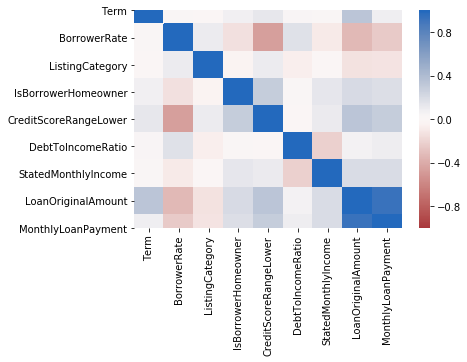

In [574]:
sb.heatmap(data = df_corr, cmap = 'vlag_r', vmin = -1, vmax = 1, center = 0 )
; 

The correlation heatmap indicates strong to moderate degrees of correlation between:
* Borrower Rate and Credit Score
* Borrower Rate and Loan Amount
- Credit Score and Loan Amount
- Borrower Home Ownership and Credit Score
- Term and Load Amount

There is also very strong correlation between LoanOriginalAmount and MonthlyLoanPayment, which is understandble given the direct relationship between the two. Note that this table only includes one of the "key interest" variables - "BorrowerRate", but not "LoanStatus".

In the following sections, we'll look into the variables' relationships in details.

<a id = 'b'></a>

### Borrower Rate vs. Other Variables:

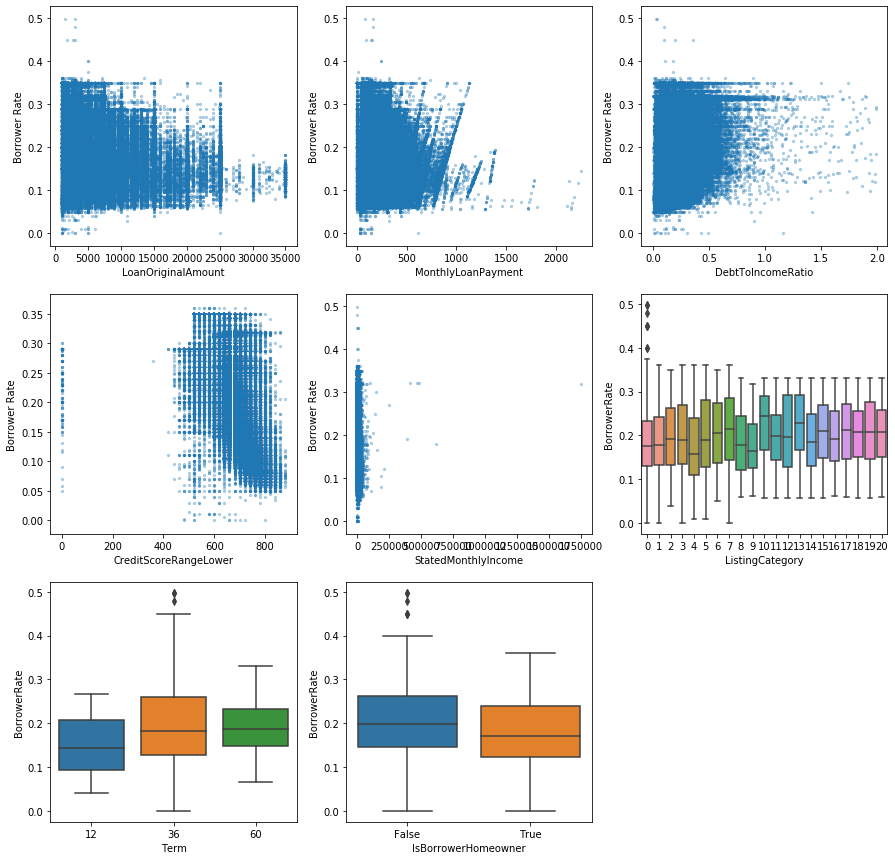

In [653]:
# Initial plots of pair-wise variables
plt.figure(figsize = [15, 15])
i=0
#numeric features:
for m in ['LoanOriginalAmount','MonthlyLoanPayment',
          'DebtToIncomeRatio','CreditScoreRangeLower','StatedMonthlyIncome' ]:
    i+=1
    plt.subplot(3,3,i)
    plt.scatter(data = df, y = 'BorrowerRate', x =m, s = 5, alpha =0.3 )
    plt.xlabel(m)
    plt.ylabel('Borrower Rate')
    

#Categorical features
for m in ['ListingCategory', 'Term', 'IsBorrowerHomeowner']:
    i+=1
    plt.subplot(3,3,i)
    sb.boxplot(data = df, y = 'BorrowerRate', x =m )
    
    

There are visible correlations between 'borrower rate' and 'term' or 'homeownership'. 
- Lower 'term' duration is associated with lower median rates
- Home owners have lower rates

For the scatter plots, because of the large amounts of data points, they do not show clearly 'borrowing rate's correlation to 'LoanOriginalAmount','MonthlyLoanPayment', 'DebtToIncomeRatio','CreditScoreRangeLower'. Change them to hist2d in later revision.

''

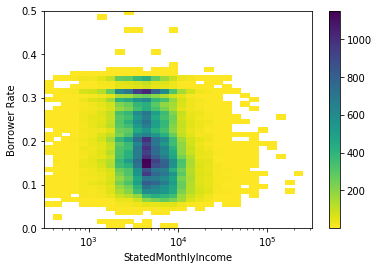

In [160]:
#plot rate vs income with log scale on income
xt = 10**np.arange(2.5, 5.51, 0.1) #monthly income 300 ~ 300,000
yt = np.arange(0, 0.51, 0.01)
plt.hist2d(data = df, y = 'BorrowerRate', x ='StatedMonthlyIncome', bins = [xt, yt], cmap = 'viridis_r', cmin = 0.5)
plt.xscale('log')
plt.xlabel('StatedMonthlyIncome')
plt.colorbar()
plt.ylabel('Borrower Rate')
;


The heatmap method shows more clearly the correlation between BorrowerRate and "income":
- Monthly income has weak correlation with borrower's interest rate: high income corresponds to slightly lower interest rate

Apply heatmap to all the scatter plots:

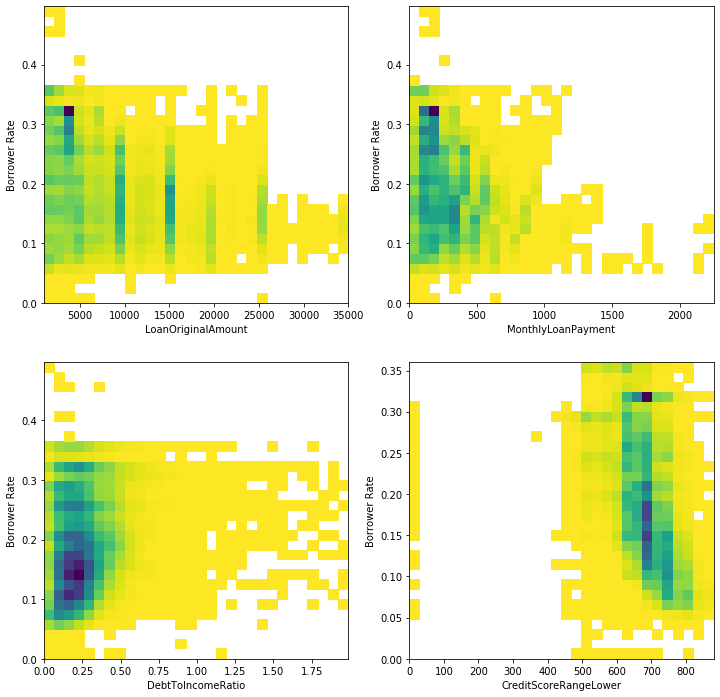

In [576]:
plt.figure(figsize = [12, 12])
i=0
#numeric features:
for m in ['LoanOriginalAmount','MonthlyLoanPayment',
          'DebtToIncomeRatio','CreditScoreRangeLower']:
    i+=1
    plt.subplot(2,2,i)
    plt.hist2d(data = df[df[m].isna()==False], y = 'BorrowerRate', x =m, cmap = 'viridis_r', cmin = 0.5 , bins = 30)
    plt.xlabel(m)
    plt.ylabel('Borrower Rate')



It is now clearly visible that borrowing rate is correlated with loan amount and credit score and DTI ratio:
- BorrowerRate is inversely correlated with LoanOriginalAmount
- BorrowerRate is inversely correlated with MonthlyLoadPayment
- BorrowerRate is positively correlated with DebtToIncomeRatio
- BorrowerRate is inversely correlated with CreditScore

<a id = 'l'></a>

### Loan Status vs. Other Variables

''

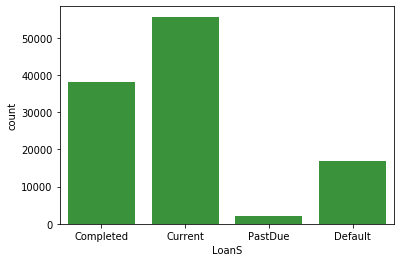

In [583]:
df_ls = df[df.LoanS.isna()  == False] #define df_ls to be excluding the cancelled loans
sb.countplot(df_ls.LoanS, color = b_color)
;

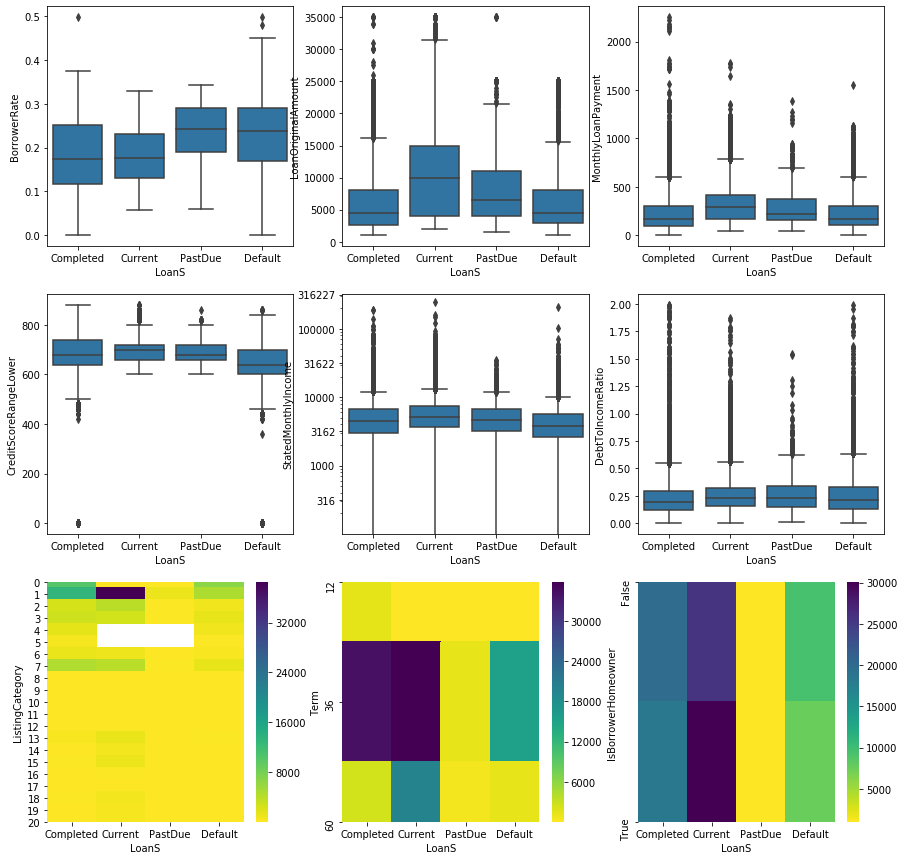

In [585]:
a_color = sb.color_palette()[0]
plt.figure(figsize = [15,15])
i=0
for m in ['BorrowerRate','LoanOriginalAmount','MonthlyLoanPayment',
 'CreditScoreRangeLower']:
    i+=1
    plt.subplot(3,3,i)
    sb.boxplot(data = df_ls, x= 'LoanS', y = m, color = a_color)
 
i+=1
plt.subplot(3,3,i)
yt = 10**np.arange(2.5, 5.51, 0.5) #monthly income 300 ~ 300,000 in log scale
sb.boxplot(data = df_ls, x= 'LoanS', y = 'StatedMonthlyIncome', color = a_color)
plt.yscale('log')
plt.yticks(yt, yt.astype(int))
plt.ylim(100, 320000)

i+=1
plt.subplot(3,3,i) 
sb.boxplot(data = df_ls, x= 'LoanS', y = 'DebtToIncomeRatio', color = a_color)

for m in ['ListingCategory','Term','IsBorrowerHomeowner']:
    i+=1
    plt.subplot(3,3,i)
    cnt = df_ls[['LoanS',m,'LoanOriginalAmount']].groupby(['LoanS',m]).count().reset_index() # LoanOriginalAmount is a dummy variable
    cnt = cnt.pivot(index = m, columns='LoanS', values = 'LoanOriginalAmount')
    sb.heatmap(data = cnt, cmap = 'viridis_r')
  

Loan status is correlated with BorrowerRate, LoanOriginalAmount, MonthlyLoanPayment, CreditScore, StatedMonthlyIncome:
- Completed or Current loans have lower BorrowerRate
- Current loans have higher LoanOriginalAmount
- Current loans have higher MonthlyLoanPayment (consistent with the previous point)
- Default loans have lower CreditScore
- Default loans have lower StatedMonthlyIncome

The last row of heatmaps focus on Loan Status' relationship with supporting categorical variables, but they are are not very illustrative in showing the relationships with Loan Status.

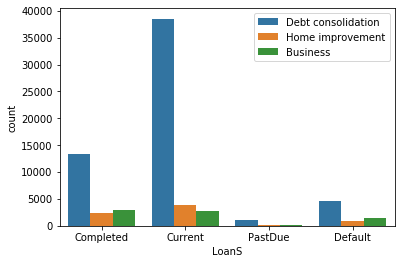

In [590]:
# use bar chart to plot listing category vs. loan status
sb.countplot(data = df_ls[df_ls.ListingCategory.isin([1,2,3])], x = 'LoanS', hue = 'ListingCategory')
plt.legend(('Debt consolidation', 'Home improvement', 'Business'));

In [344]:
cnt = cnt.pivot(index = 'LoanS', columns='ListingCategory', values = 'Term')

- Debt consolidation loans are more likely to be in 'current' status, compared to Home improvement or Business loans.

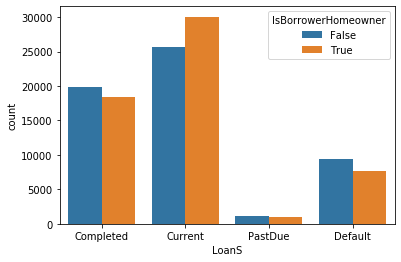

In [591]:
#'Term','IsBorrowerHomeowner'~ 'LoanS'
sb.countplot(data = df_ls, x = 'LoanS', hue = 'IsBorrowerHomeowner');

- In this dataset, home owners are more likely to have 'current' loan, and less likely to have 'default' or 'completed' loan

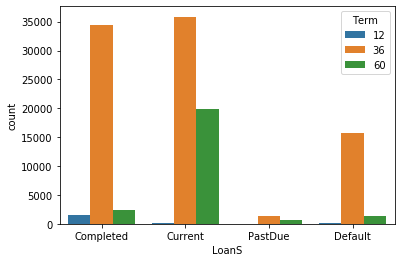

In [592]:
sb.countplot(data = df_ls, x = 'LoanS', hue = 'Term');

- 60 month loans are least likely to be 'completed', while 12 month loans most likely to be 'completed'. 36 month loans are more likely to be 'default' than loans of other terms are.

<a id = 'o'></a>

### Other Variables

Aside from the relationship between 'key interest' variables and supporting variables,  2 other relationships among supporting variables are interesting:
- Term and Load Amount
- Credit Score and Loan Amount

''

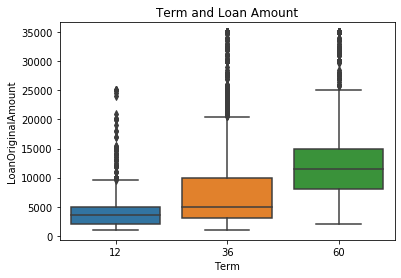

In [605]:
#Term and Load Amount
sb.boxplot(data = df, x = 'Term', y = 'LoanOriginalAmount')
plt.xlabel('Term')
plt.ylabel('LoanOriginalAmount')
plt.title('Term and Loan Amount')
;

- Longer Terms associate with higher Loan Amounts

''

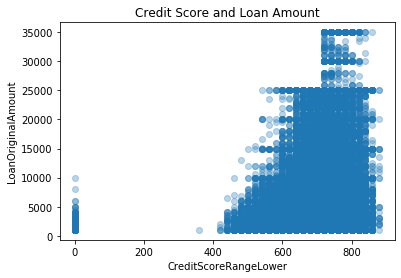

In [597]:
#Credit Score and Loan Amount
plt.scatter(data = df, x ='CreditScoreRangeLower', y = 'LoanOriginalAmount', alpha = 0.3)
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('LoanOriginalAmount')
plt.title('Credit Score and Loan Amount')
;

It seems that how high the loan amount can be is limited by how high the credit score is. Though there are many overlapping points, change to heatmap below.

''

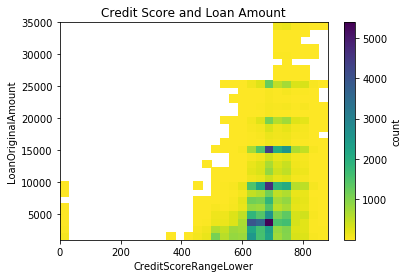

In [602]:
plt.hist2d(data = df[df.CreditScoreRangeLower.isna() ==False], x ='CreditScoreRangeLower', y = 'LoanOriginalAmount',
           cmap = 'viridis_r', cmin = 0.5, bins = 30)
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('LoanOriginalAmount')
plt.title('Credit Score and Loan Amount')
plt.colorbar(label = 'count')
;

''

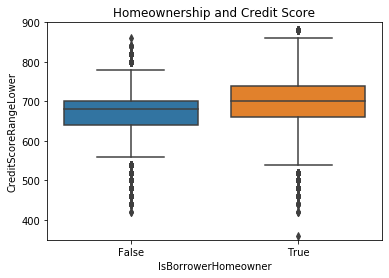

In [646]:
#Homeownership and Credit Score
sb.boxplot(data = df, x = 'IsBorrowerHomeowner', y = 'CreditScoreRangeLower')
plt.xlabel('IsBorrowerHomeowner')
plt.ylabel('CreditScoreRangeLower')
plt.title('Homeownership and Credit Score')
plt.ylim(350, 900)
;

In [652]:
print('homeonwer credit score: {0:.0f}'.format(df[df.IsBorrowerHomeowner == True].CreditScoreRangeLower.mean()) )
print('non-homeonwer credit score: {0:.0f}'.format( df[df.IsBorrowerHomeowner == False].CreditScoreRangeLower.mean()) )


homeonwer credit score: 705
non-homeonwer credit score: 666


- LoanOriginalAmount is possitively correlated with CreditScore
- Higher LoanOriginalAmount is only possible with higher CreditScore
- Homeowers have higher median and mean CreditScore

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Borrowing Rate relationships:
- Higher Borrower Rates are associated with lower Credit Score, or higher Debt to Income Ratio
- BorrowerRate is inversely correlated with Monthly Loan Payment, or Loan Original Amount, which is strange
- Shorter 'term' duration is associated with lower median borrowing rates
- Home owners have lower borrowing rates

Loan Status relationships:
- Completed or Current loans have lower borrowing rates
- Current loans have higher Loan Original Amount, as well as Monthly Loan Payment
- Default loans have lower Credit Score
- Default loans have lower Stated Monthly Income
- Home owners are more likely to have 'current' loan, and less likely to have 'default' or 'completed' loan
- Debt consolidation loans are more likely to be in 'current' status, compared to Home improvement or Business loans.
- 60-month loans are least likely to be 'completed', while 12-month loans most likely to be 'completed'. 36-month loans are more likely to be 'defaulted' than the other loan terms.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Some of the relationships between non-key variables are:
- Longer Terms associate with higher Loan Amounts
- Loan Original Amount is possitively correlated with Credit Score
- Higher Loan OriginalAmount is only possible with higher Credit Score
- Homeowers have higher median and mean Credit Score


<a id = 'm'></a>

## Multivariate Exploration


In [642]:
#'BorrowerRate', 'LoanOriginalAmount', 'CreditScoreRangeLower'
c_b = np.percentile(df[df.CreditScoreRangeLower.isna()==False].CreditScoreRangeLower, np.arange(11)*10)
df['CreditScoreR'] = pd.cut(df.CreditScoreRangeLower, c_b, labels = np.arange(9), duplicates = 'drop')
c_b

array([  0., 620., 640., 660., 680., 680., 700., 720., 740., 760., 880.])

''

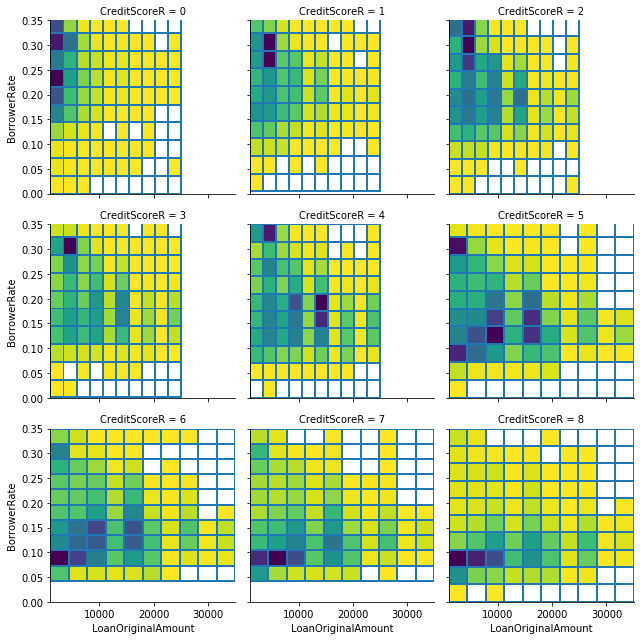

In [637]:
g = sb.FacetGrid(data = df, col = 'CreditScoreR', col_wrap = 3 )
g.map(plt.hist2d, 'LoanOriginalAmount', 'BorrowerRate', cmap = 'viridis_r', cmin = 0.5)

;

''

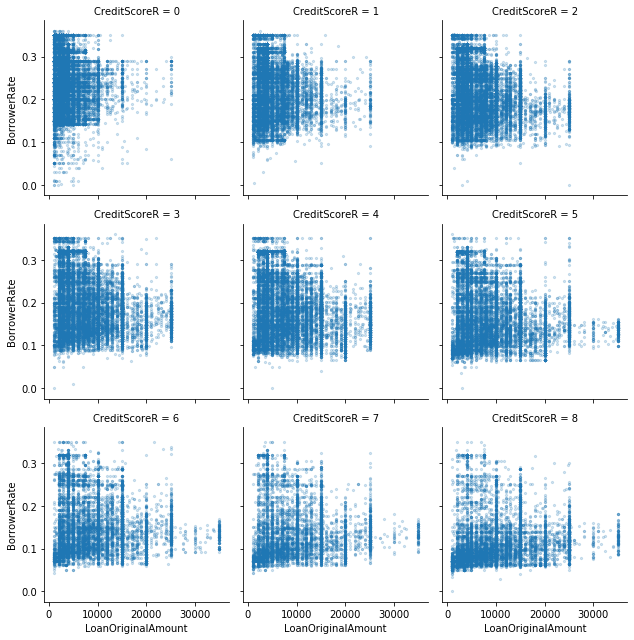

In [640]:
g = sb.FacetGrid(data = df, col = 'CreditScoreR', col_wrap = 3 )
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', alpha = 0.2, s =5)

;

For loans with high credit score ratings, the trend of 'higher loan'~'lower interest rate' no longer hold. In fact, when credit score is > 760, higher loan amount tends to have slightly higher interest range. 
- When looking within each credit score range, loan amount does not necessarily show negative correlation with interest rate.

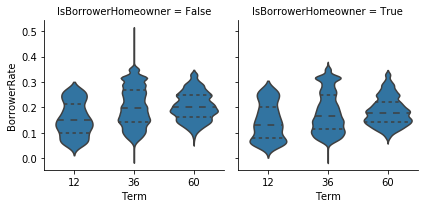

In [385]:
#'BorrowerRate','IsBorrowerHomeowner', 'Term'
g = sb.FacetGrid(data = df, col = 'IsBorrowerHomeowner')
g.map(sb.violinplot, 'Term', 'BorrowerRate', inner = 'quartile');

From these violin plots, the difference between homeowner and non-homeowner is not clear. Re-plot with boxplot next.

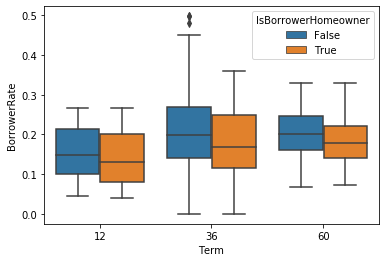

In [397]:
sb.boxplot(data = df_ls, x = 'Term', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', dodge = True);


The graphs shows:
- 12-month termed loans have lower median interest rate for both homeowners and non-homeowners, than other terms of loans.
- Home owners typically have lower interest rate than non-homeonwers for all terms of loans.

In [659]:
#Loan default rate, home owner, Monthly income
df['LoanDefault'] = (df.LoanS == 'Default')
df.head()

,Term,LoanStatus,BorrowerRate,ListingCategory,IsBorrowerHomeowner,CreditScoreRangeLower,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,LoanS,CreditScoreR,LoanDefault
0,36,Completed,0.1580,0,True,640.0,0.17,3083.333333,9425,330.43,Completed,1,False
1,36,Current,0.0920,2,False,680.0,0.18,6125.000000,10000,318.93,Current,3,False
2,36,Completed,0.2750,0,False,480.0,0.06,2083.333333,3001,123.32,Completed,0,False
3,36,Current,0.0974,16,True,800.0,0.15,2875.000000,10000,321.45,Current,8,False
4,36,Current,0.2085,2,True,680.0,0.26,9583.333333,15000,563.97,Current,3,False


In [667]:
# need to convert continuous income values to descrete levels
i_b = np.percentile(df[df.StatedMonthlyIncome.isna() == False].StatedMonthlyIncome, np.arange(0,101, 10))
i_b

array([1.41666700e+00, 2.25000000e+03, 2.91666667e+03, 3.50000000e+03,
       4.16666667e+03, 4.71633333e+03, 5.41666667e+03, 6.25000000e+03,
       7.50000000e+03, 9.83333333e+03, 1.75000292e+06])

In [679]:
i_l = np.percentile(df[df.StatedMonthlyIncome.isna() == False].StatedMonthlyIncome, np.arange(5,96, 10))
i_l

array([ 1750.       ,  2616.666667 ,  3319.8333335,  3833.333333 ,
        4416.666667 ,  5000.       ,  5833.333333 ,  6833.333333 ,
        8333.333333 , 12341.325    ])

In [685]:
i_l_s = i_l.astype('int').astype('str')
i_l_s

array(['1750', '2616', '3319', '3833', '4416', '5000', '5833', '6833',
       '8333', '12341'], dtype='<U11')

In [671]:
df['IncomeLevel'] = pd.cut(df.StatedMonthlyIncome, bins = i_b, labels = np.arange(10) )

''

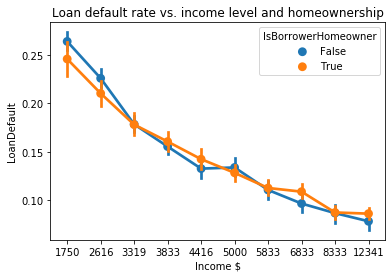

In [693]:
sb.pointplot(data = df, x='IncomeLevel', y='LoanDefault', hue = 'IsBorrowerHomeowner')
plt.xticks(ticks = np.arange(10),labels = i_l.astype('int'))
plt.title('Loan default rate vs. income level and homeownership')
plt.xlabel('Income $')
;

- LoanDefault rate is heavily impacted by borrower's IncomeLevel; If the income is less that $3000, the lack of homeownership raises the LoanDefault rate even higher.

''

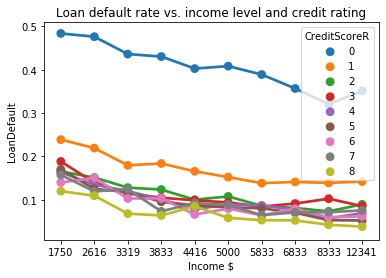

In [696]:
sb.pointplot(data = df, x='IncomeLevel', y='LoanDefault', hue = 'CreditScoreR', ci = None)
plt.xticks(ticks = np.arange(10),labels = i_l.astype('int'))
plt.title('Loan default rate vs. income level and credit rating')
plt.xlabel('Income $')
;

Credit rating with 9 levels makes the graph look busy. Change to 4 levels

In [699]:
c_l = np.quantile(df[df.CreditScoreRangeLower.isna()==False].CreditScoreRangeLower, np.arange(0, 1.1, 0.25))
df['CreditScoreRS'] = pd.cut(df.CreditScoreRangeLower, c_l, labels = ['Low','mid-low','mid-high','high'])
c_l

array([  0., 660., 680., 720., 880.])

''

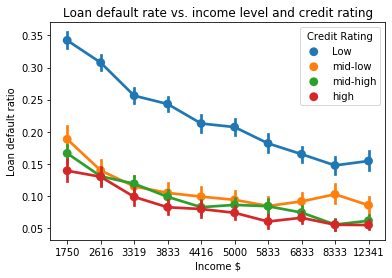

In [702]:
sb.pointplot(data = df, x='IncomeLevel', y='LoanDefault', hue = 'CreditScoreRS')
plt.xticks(ticks = np.arange(10),labels = i_l.astype('int'))
plt.title('Loan default rate vs. income level and credit rating')
plt.xlabel('Income $')
plt.legend(title = 'Credit Rating')
plt.ylabel('Loan default ratio')
;

- Loan default probability is highly correlated by income: lower income is aoociated with higher loan default probability
- Credit score also has strong correlation with loan default probability: lower credit rating is more likely to see loan defaulted. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- 12-month termed loans have lower median interest rate for both homeowners and non-homeowners, than other terms of loans.
- Home owners have lower interest rate than non-homeonwers for all terms of loans.
- Loan default probability is highly correlated with income: lower income is aoociated with higher loan default probability. At the same time, credit score also has strong correlation with loan default probability: lower credit rating is more likely to see loan defaulted. A loan borrowed by people with \\$2000 monthly income can have 3 times the probability of defaulting the loan than those with average credit rating and \\$5000 monthly income.


### Were there any interesting or surprising interactions between features?

For loans with high credit score ratings, the trend of 'higher loan'~'lower interest rate' no longer hold. In fact, when credit score is > 760, higher loan amount tends to have slightly higher interest range.